In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import json 
from astropy import units as u
import itertools as it
import os
import random
import re


In [2]:
json_list = os.listdir("/Users/snorris/manyTDE/data/sources/")
del json_list[64]

In [3]:
from astropy.cosmology import WMAP9 as cosmo
Ho = cosmo.H(0)  
from astropy.constants import c
from astropy.constants import e
from astropy.constants import h
from astropy.constants import k_B

In [4]:
def BB_flux(temp,luminosity, filter_frequency):
    """
    function takes temperature,luminosity, and an array of each filter frequency and returns the absolute blackbody flux for each wavelength
    """
    abs_BB_flux = (2*h*(filter_frequency**3)/c**2)*(((2.718281828459045**((h*filter_frequency)/(k_B*temp)))-1)**(-1))
    return(abs_BB_flux)

In [5]:
BB_flux(2*10**4*u.Kelvin,10**44*(u.erg/u.s),((10000*u.angstrom).to(u.Hz, equivalencies = u.spectral())))

<Quantity 3.77229186e-07 Hz3 s3 J / m2>

In [72]:
wave_list = np.arange(500,10500,100)*u.angstrom
def BB_TDE(filter_wavelength,temp):
    """
    function takes temperature,luminosity, and an array of each filter frequency and returns the absolute blackbody flux for each wavelength
    """
    abs_BB_flux = []
    for x in range(len(filter_wavelength)):
        abs_BB_flux.append((2*h*((filter_wavelength[x].to(u.Hz, equivalencies = u.spectral()))**3)/c**2)*((2.718281828459045**((h*((filter_wavelength[x]).to(u.Hz, equivalencies = u.spectral()))/(k_B*temp)))-1)**(-1)))
    newlist = [abs_BB_flux[i].to_value() for i in range(len(filter_wavelength))]
    BB_spec = plt.plot(filter_wavelength,newlist)
    #plt.yscale('log')
    plt.ylabel('Blackbody Radiance(Hz^3s^2J/m^2)')
    plt.xlabel('wavenlength(Angstroms)')
    plt.title('Blackbody Spectrum of Hypothetical TDE')
    return(BB_spec)

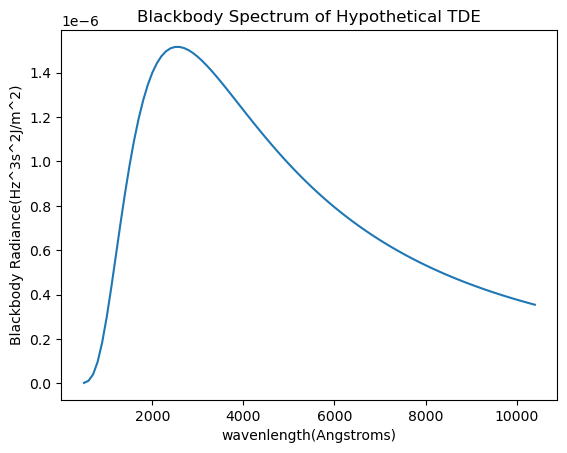

In [74]:
BB_TDE(wave_list,2*10**4*u.Kelvin)

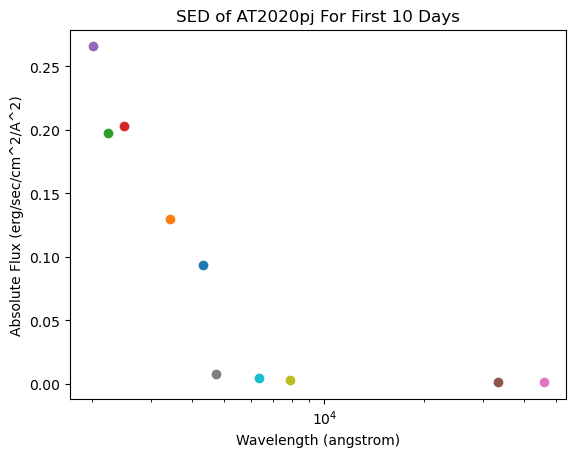

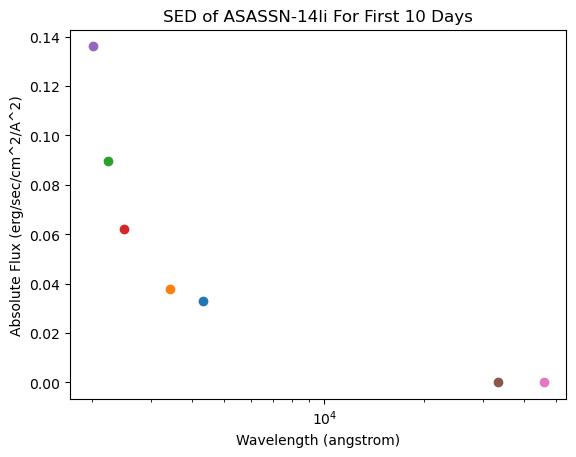

/var/folders/sf/0bstxplx5xl9vkm7jtbmvr8h0005v1/T/ipykernel_42255/825129812.py:31: RuntimeWarning: Mean of empty slice
  Aflux_filter = np.nanmean(Aflux[i_filter])


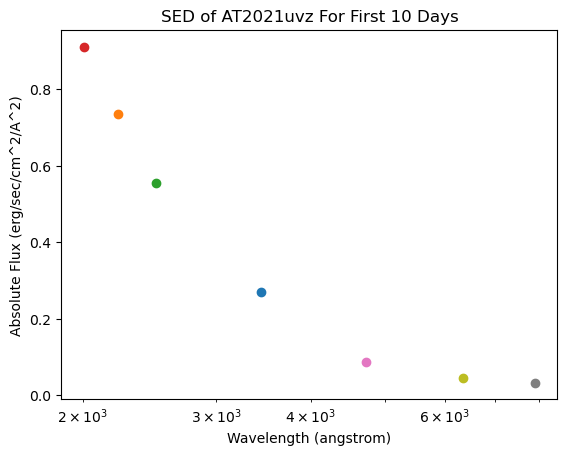

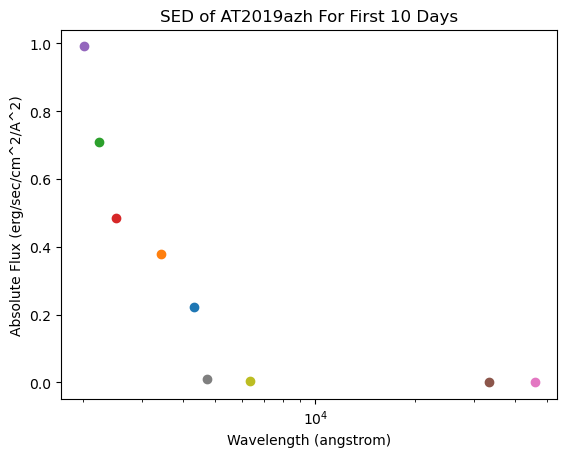

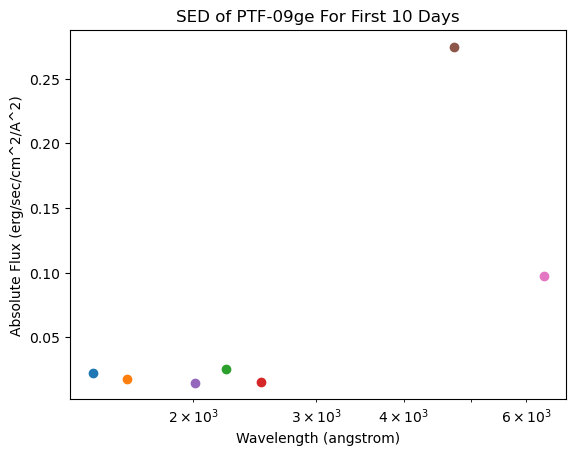

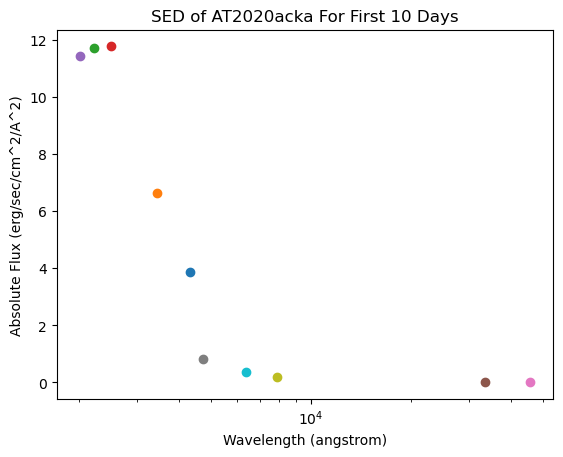

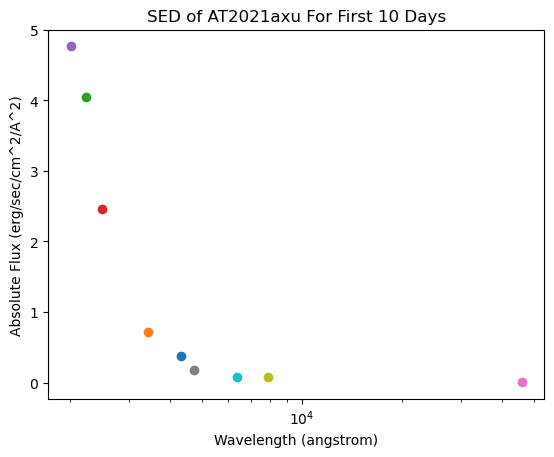

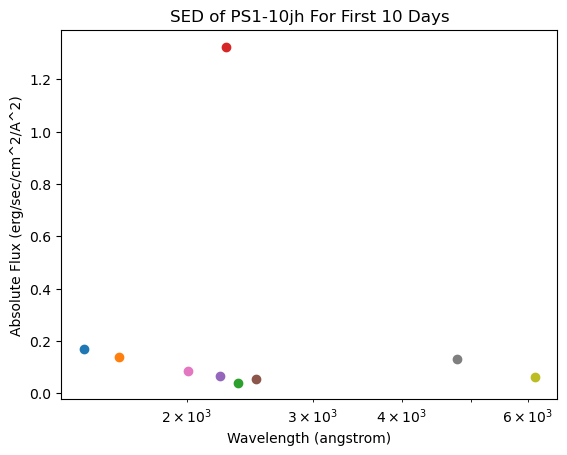

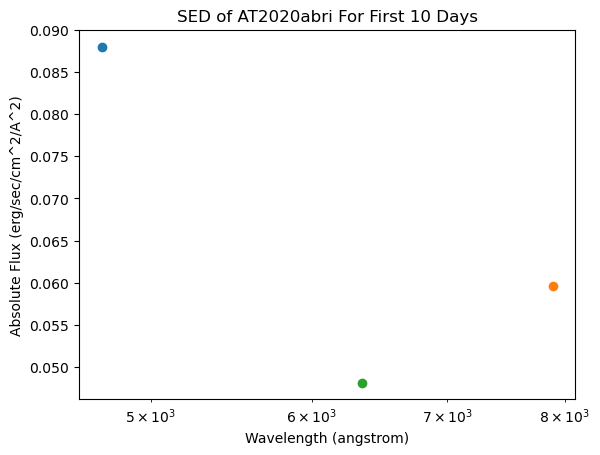

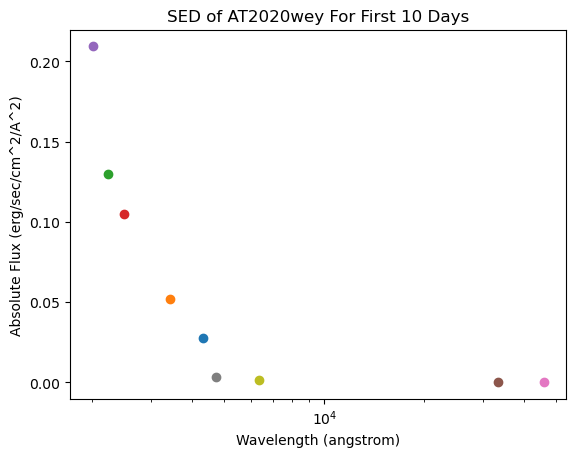

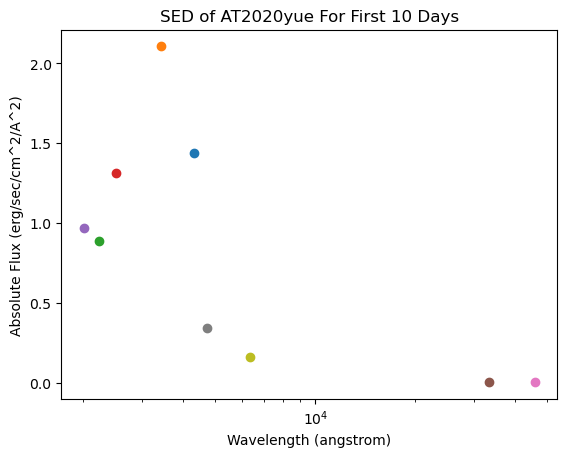

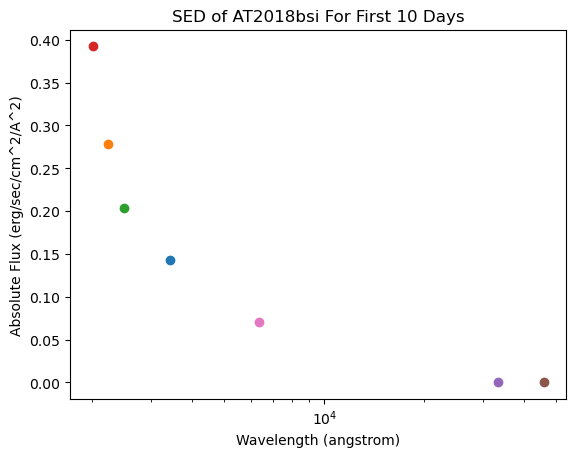

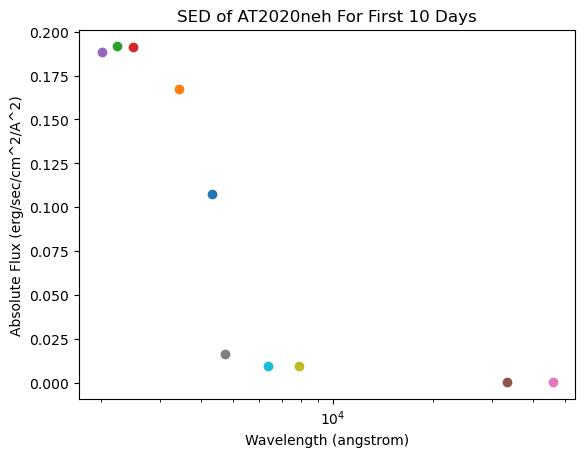

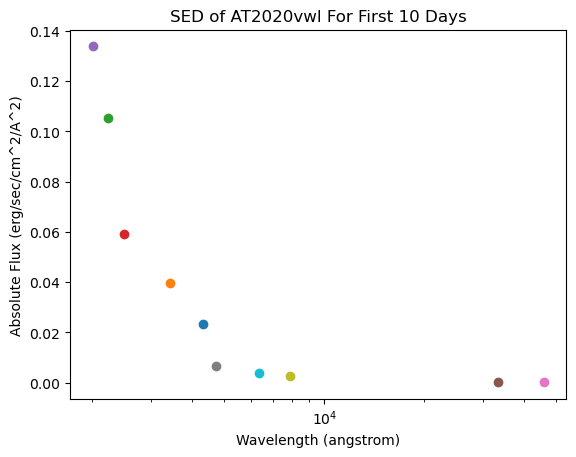

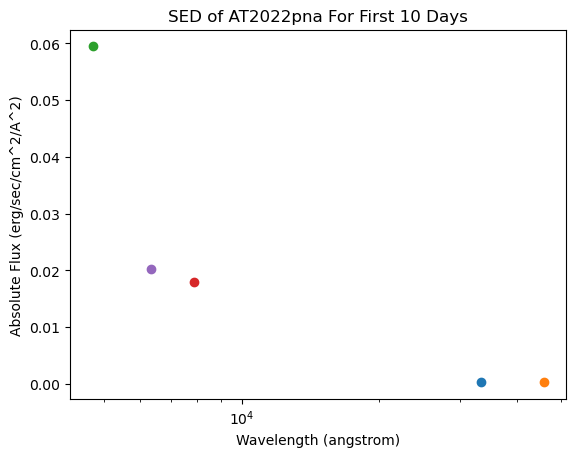

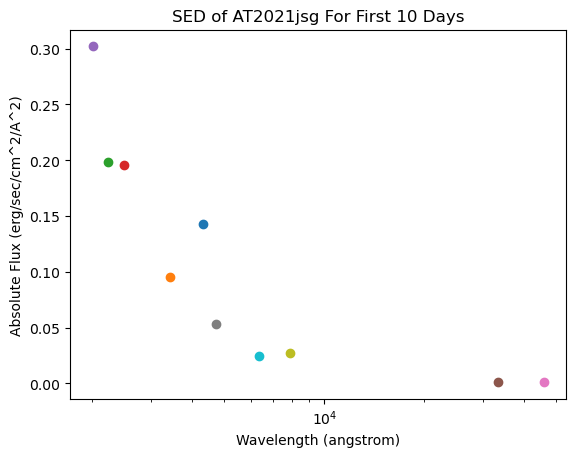

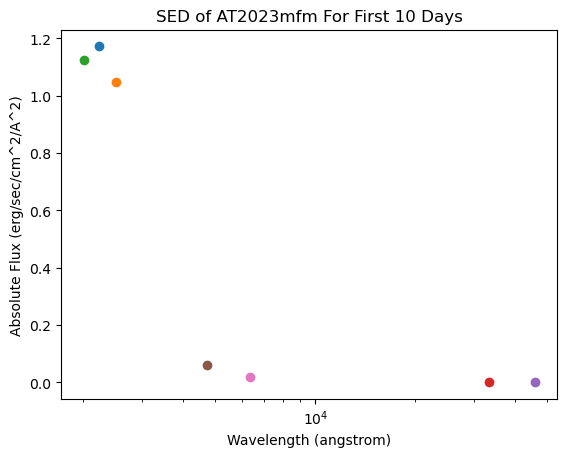

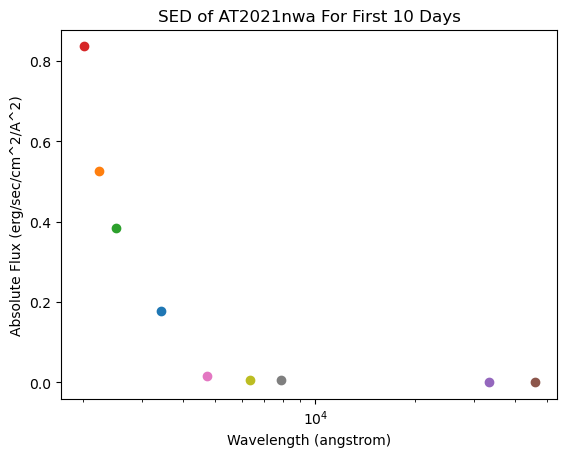

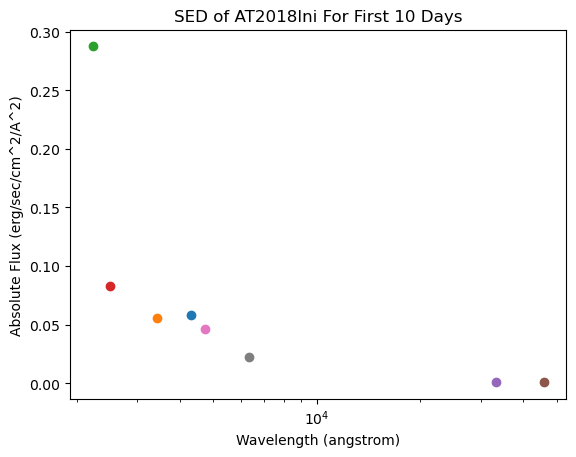

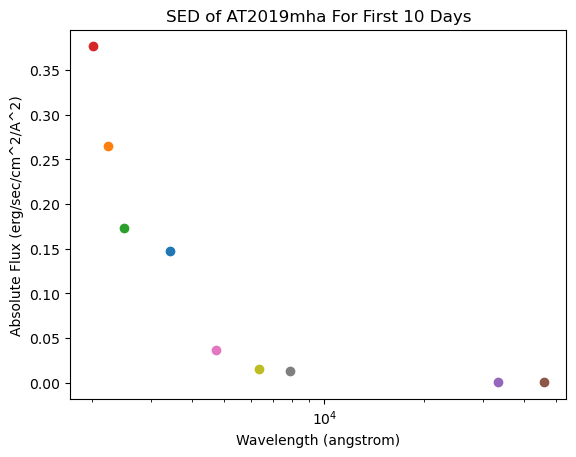

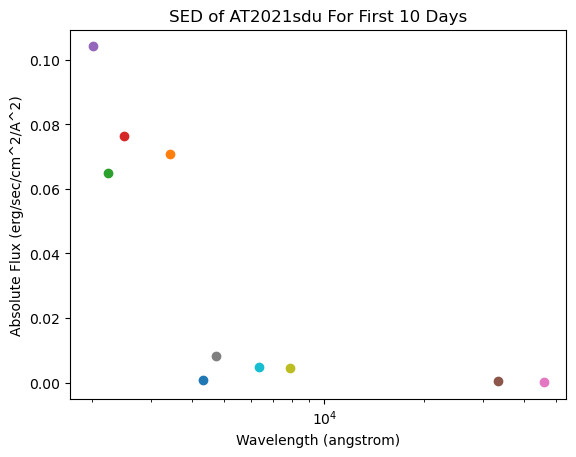

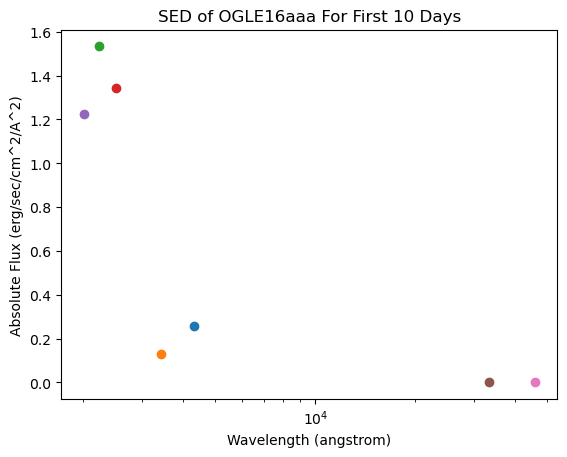

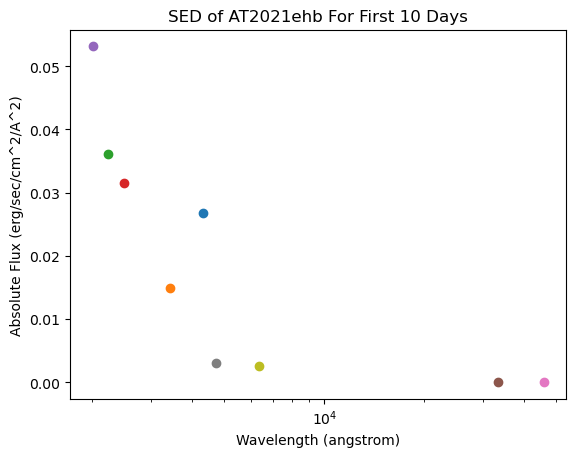

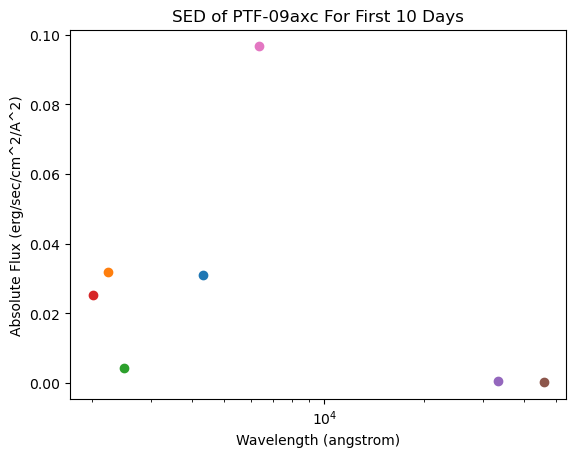

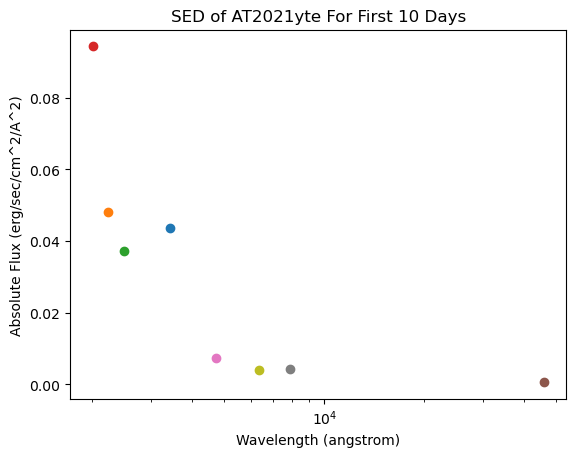

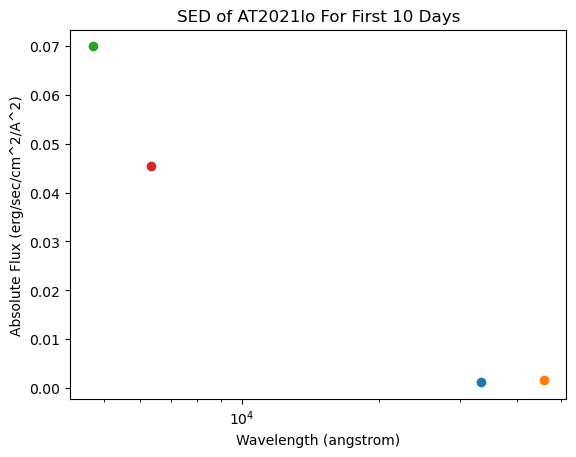

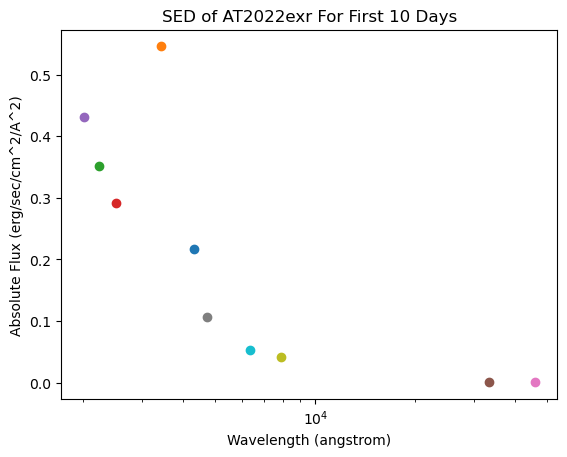

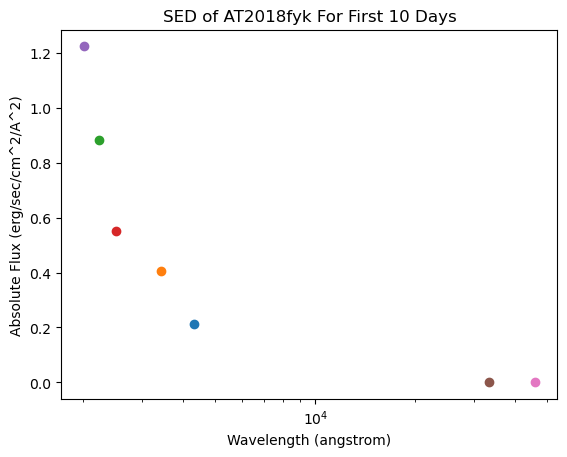

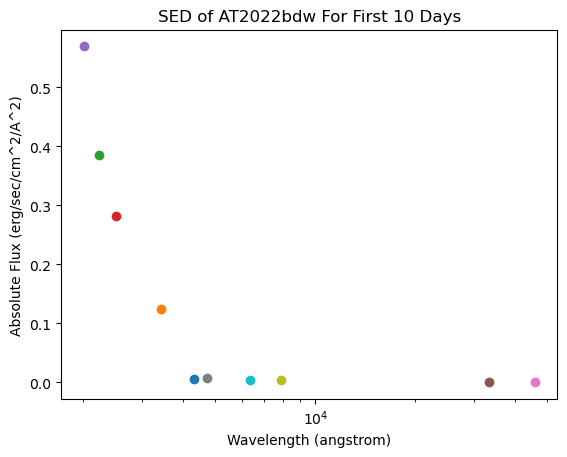

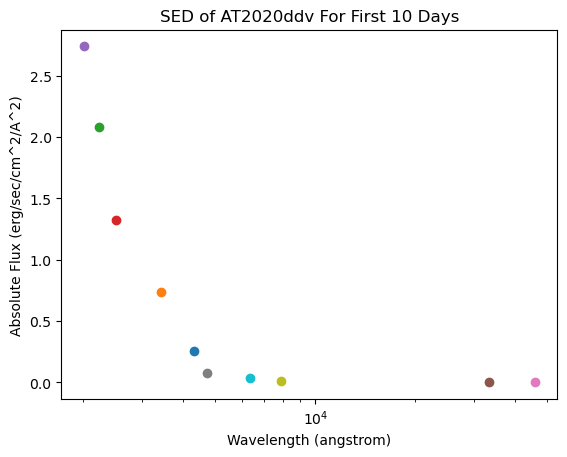

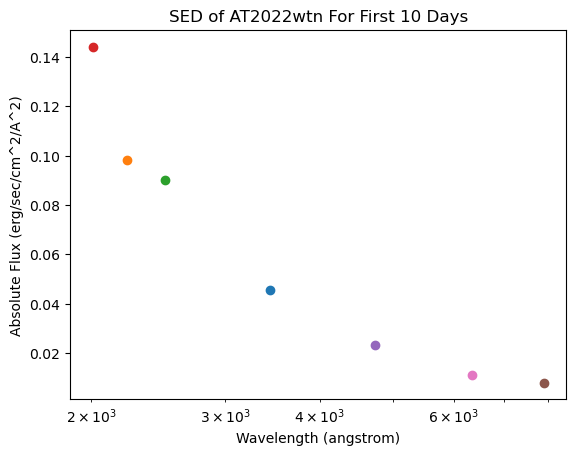

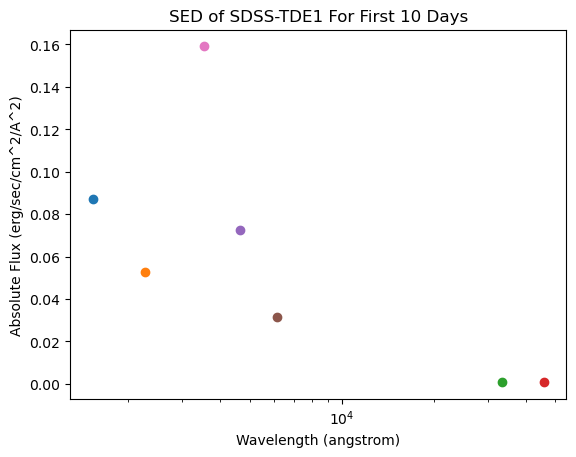

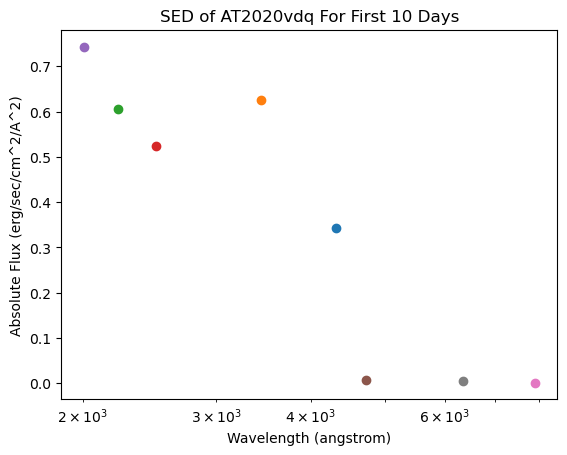

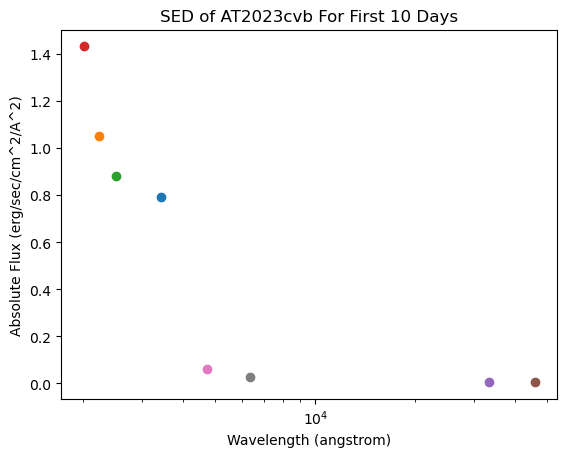

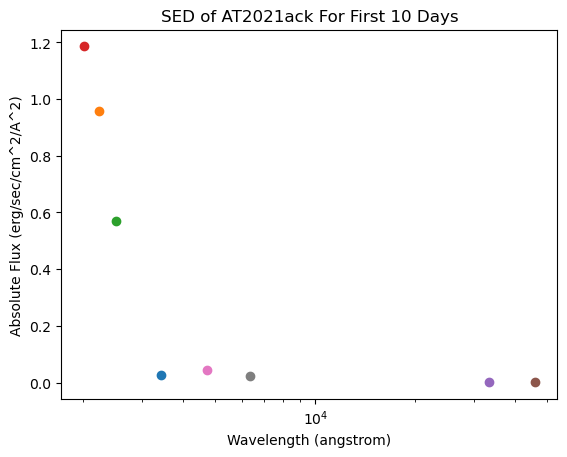

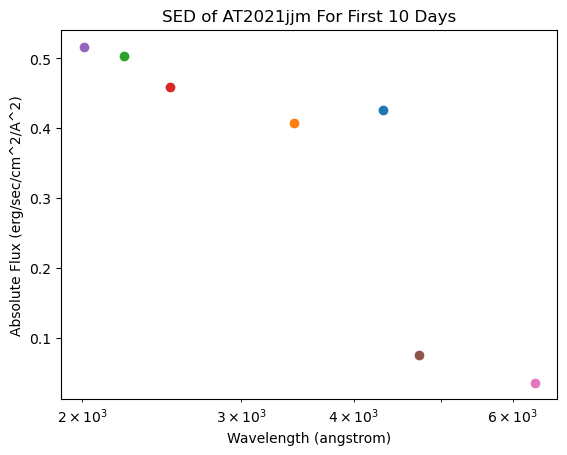

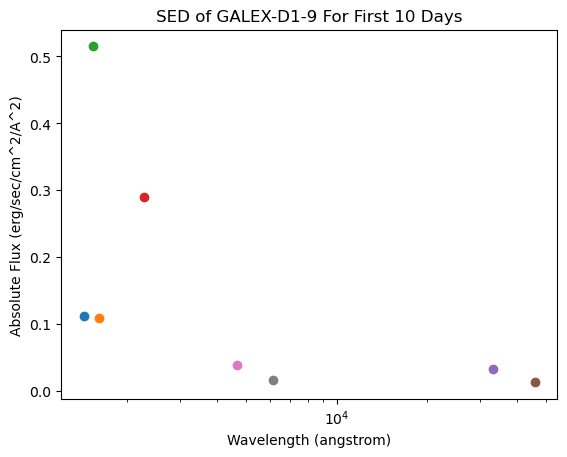

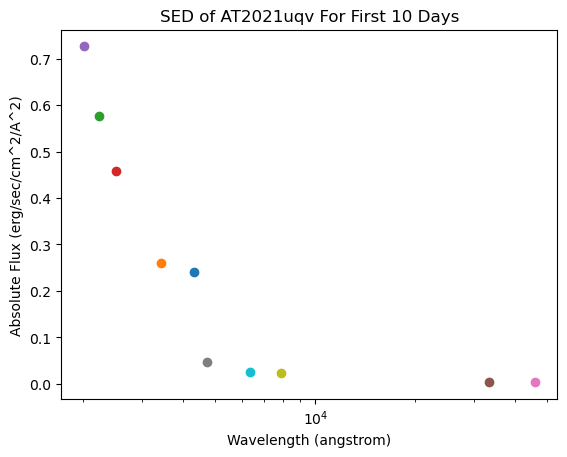

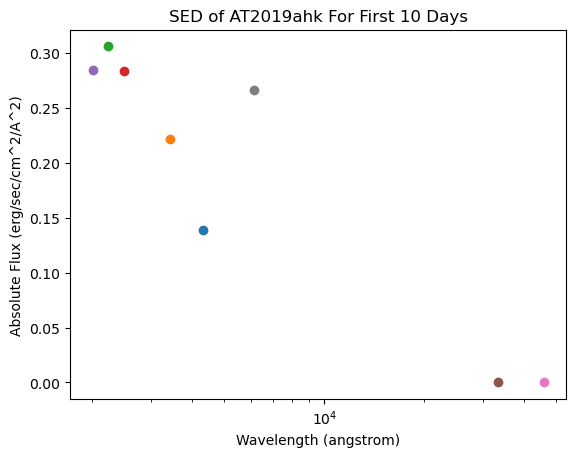

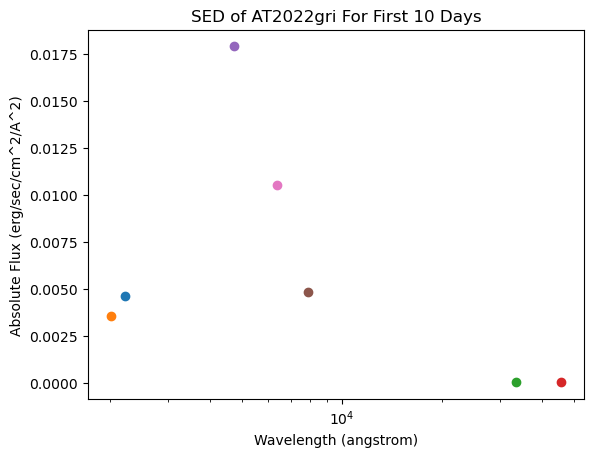

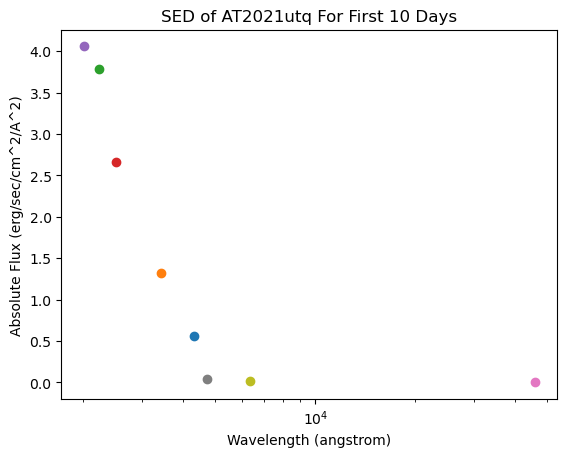

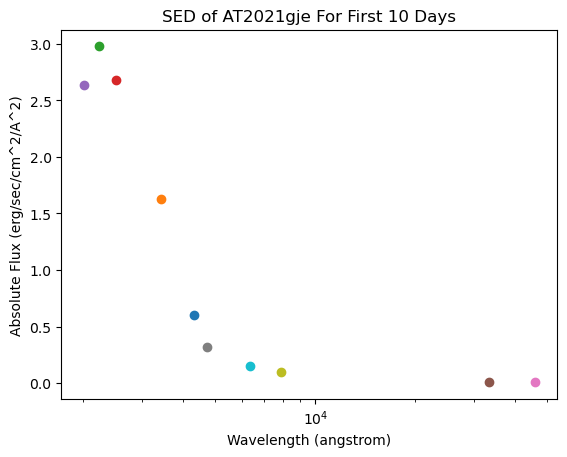

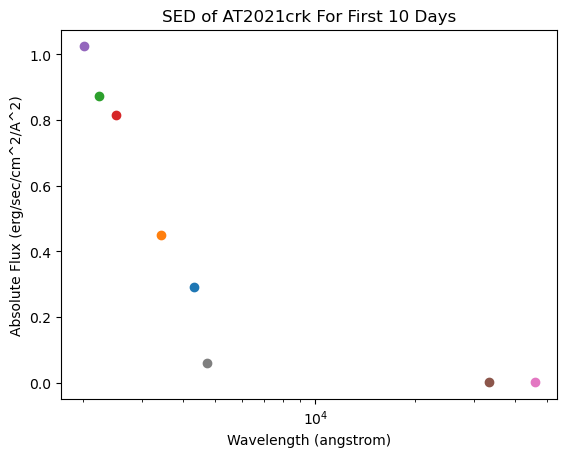

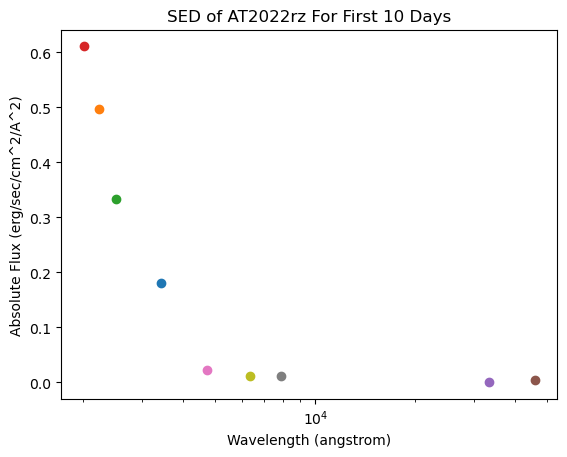

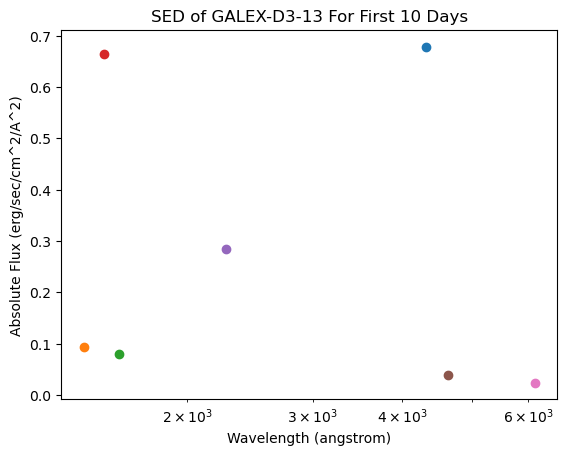

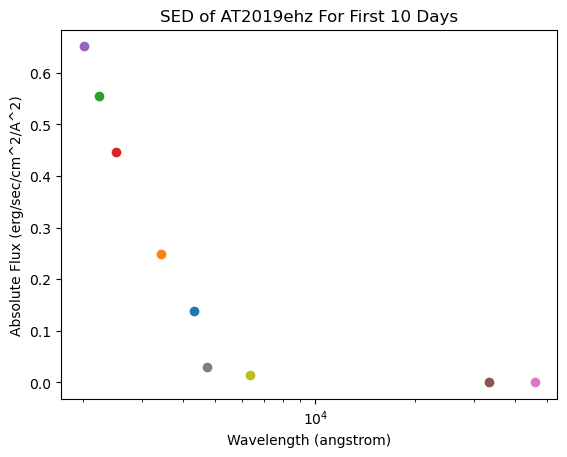

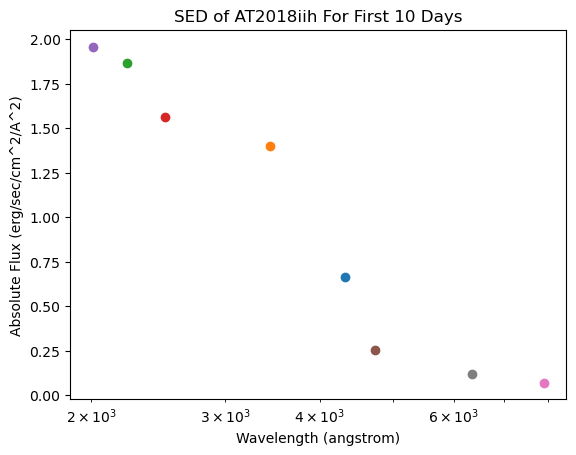

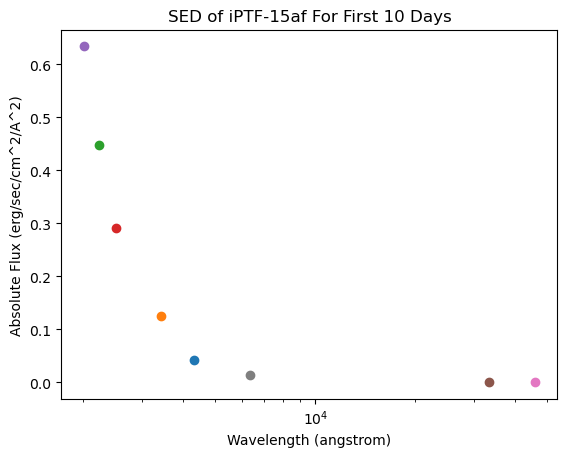

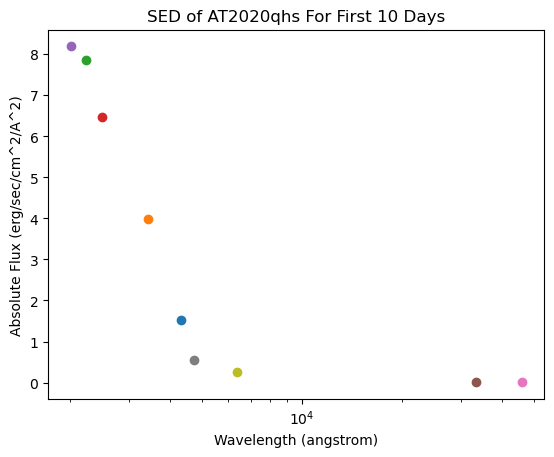

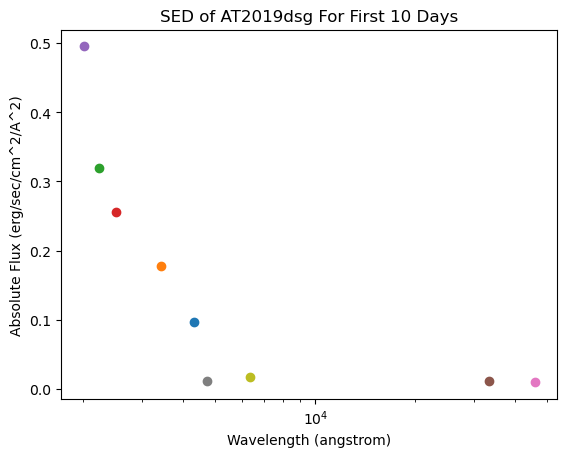

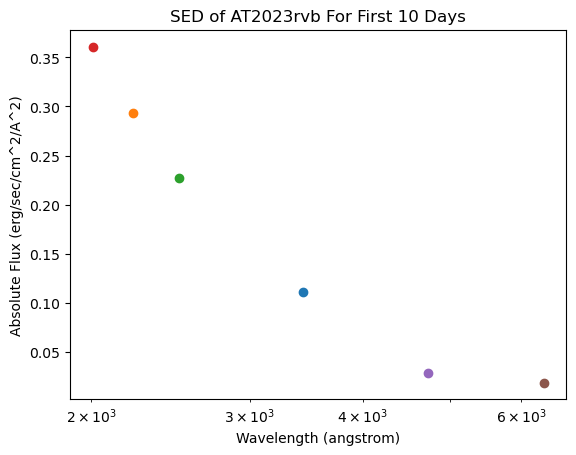

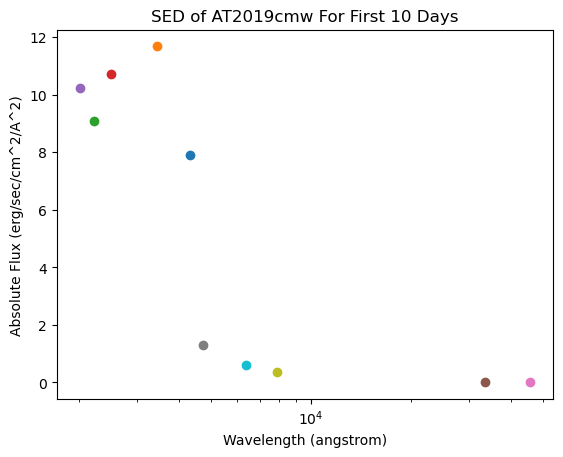

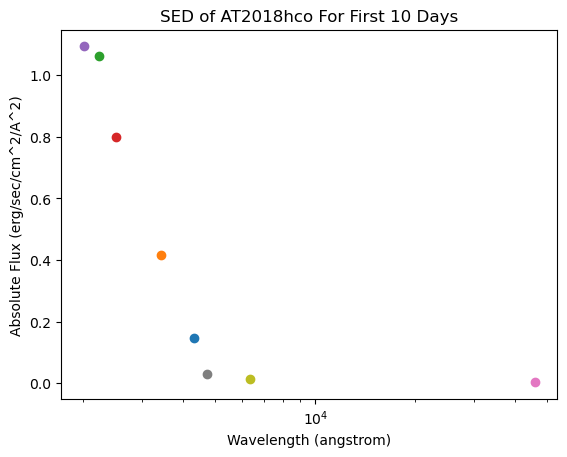

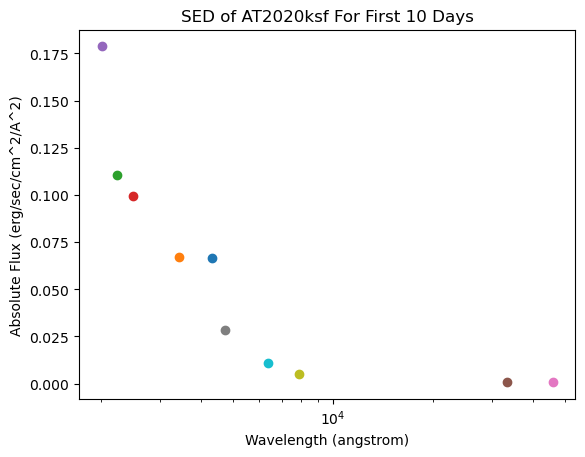

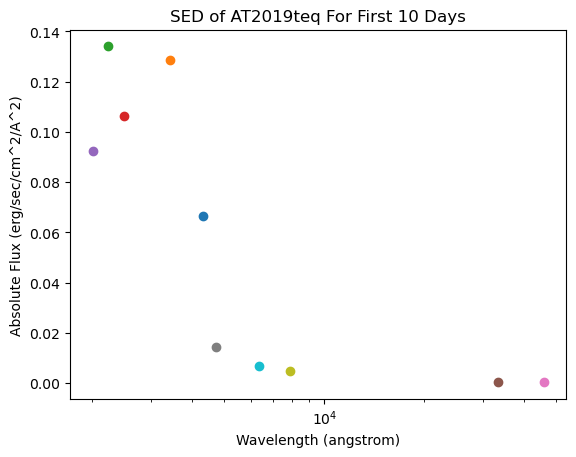

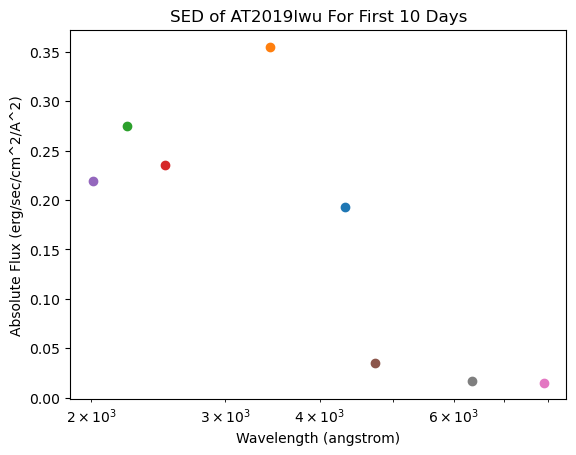

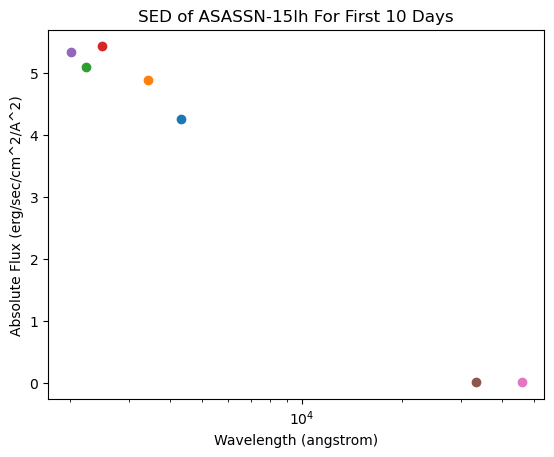

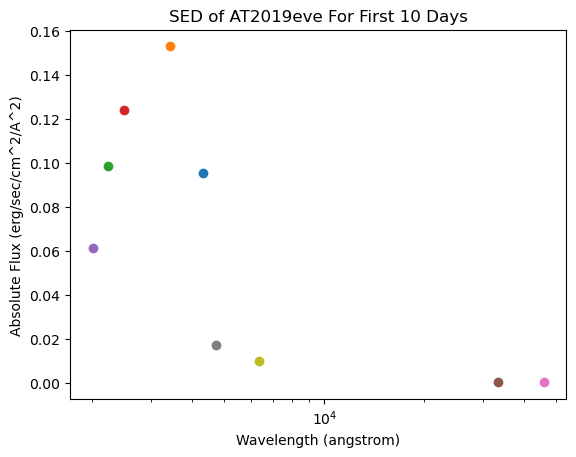

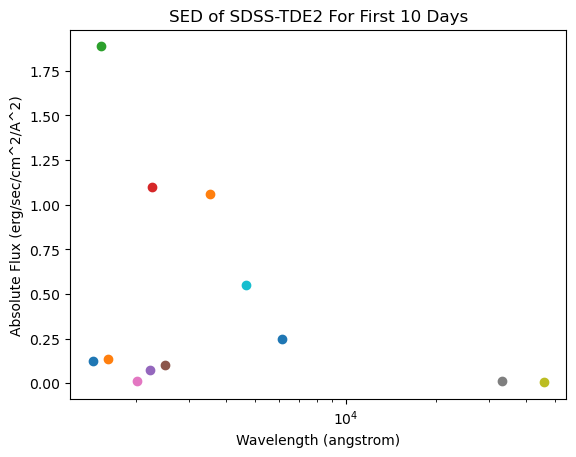

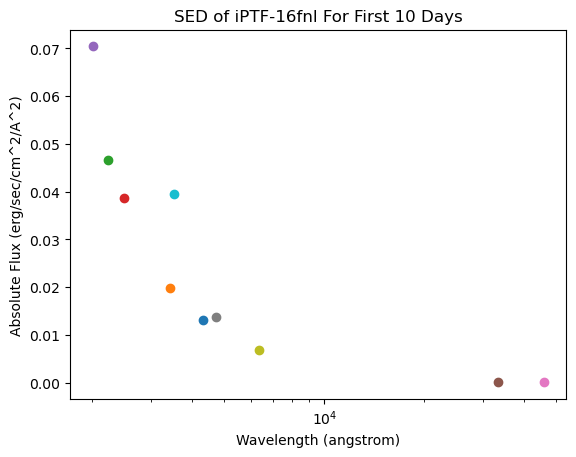

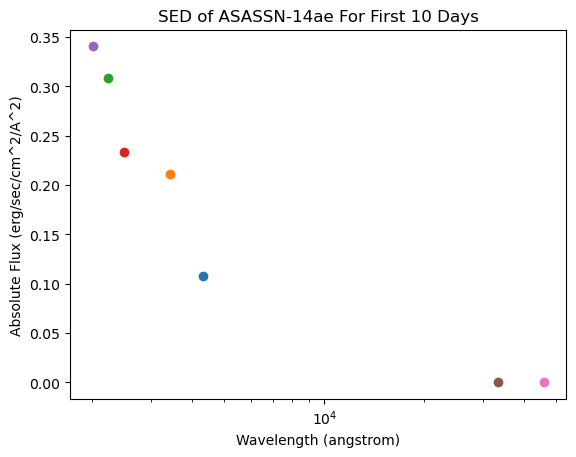

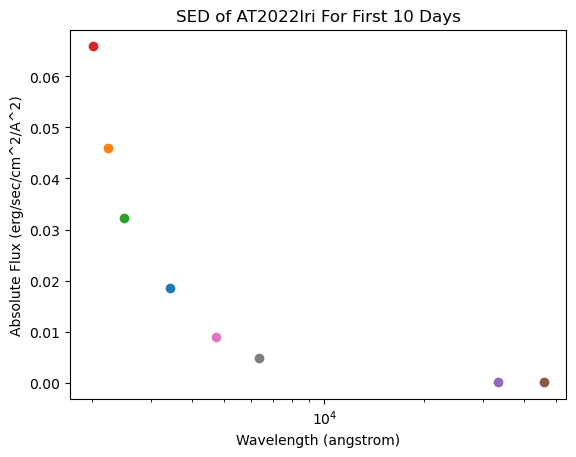

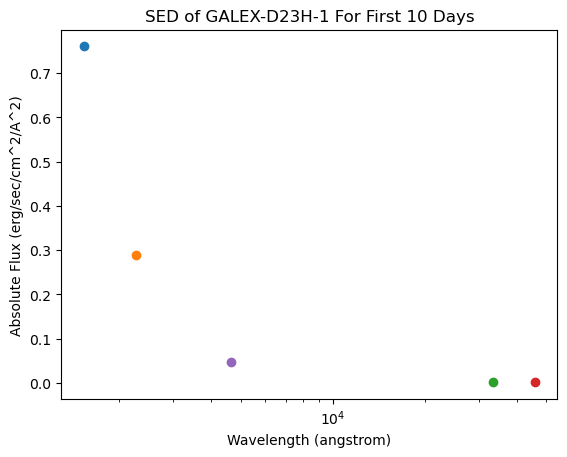

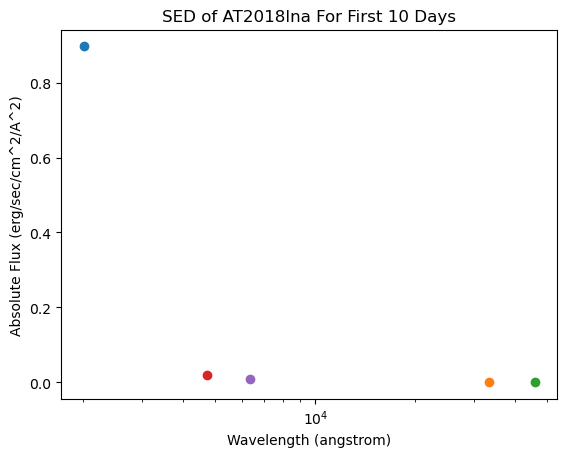

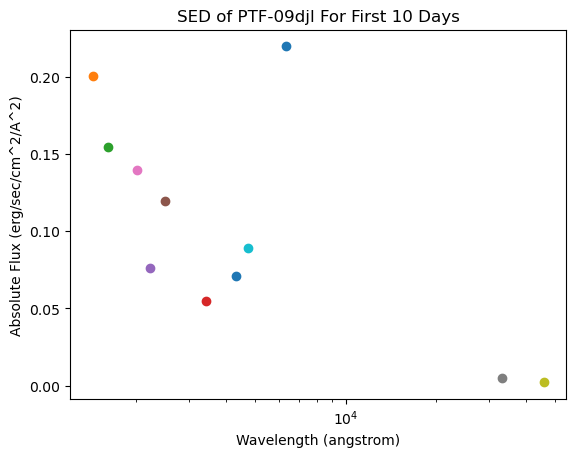

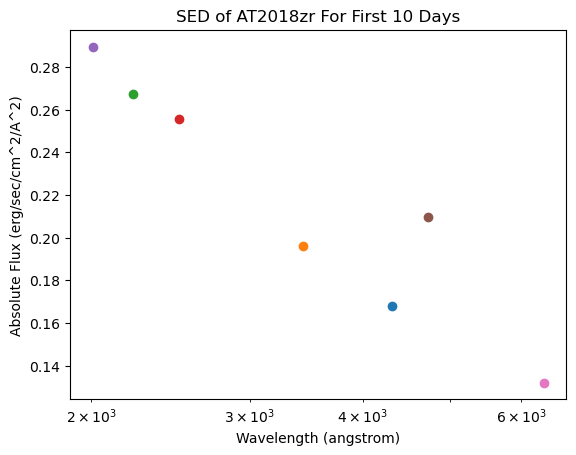

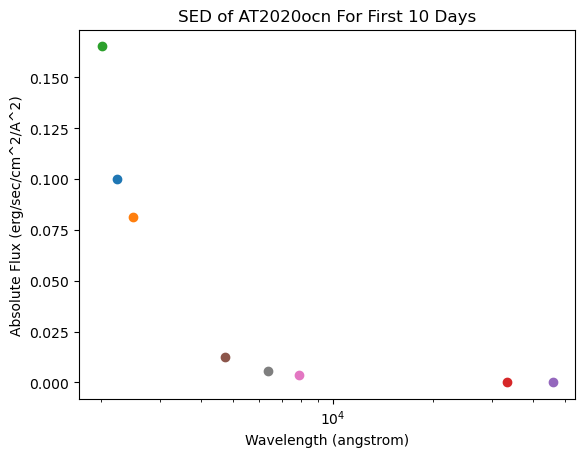

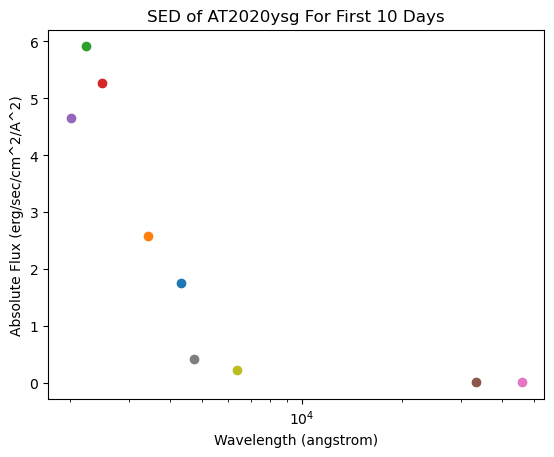

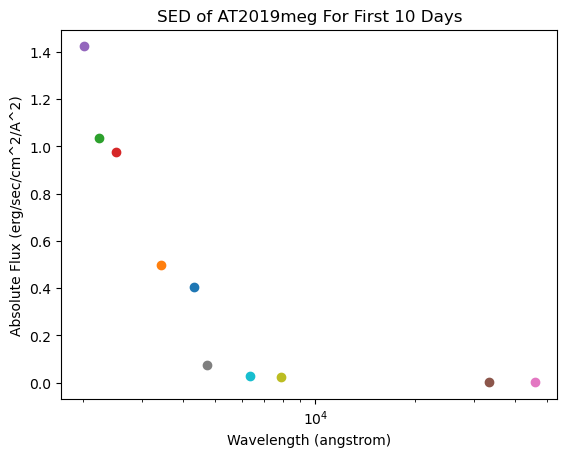

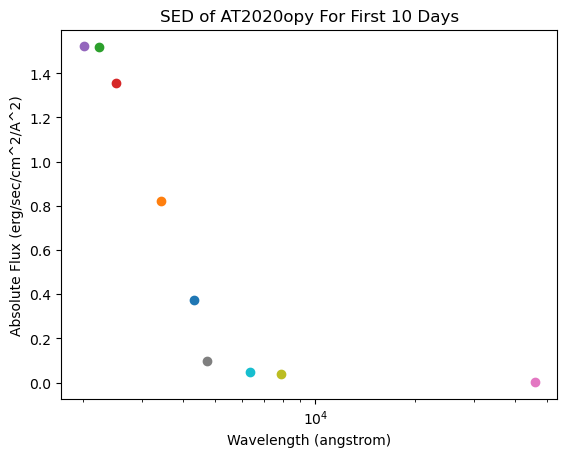

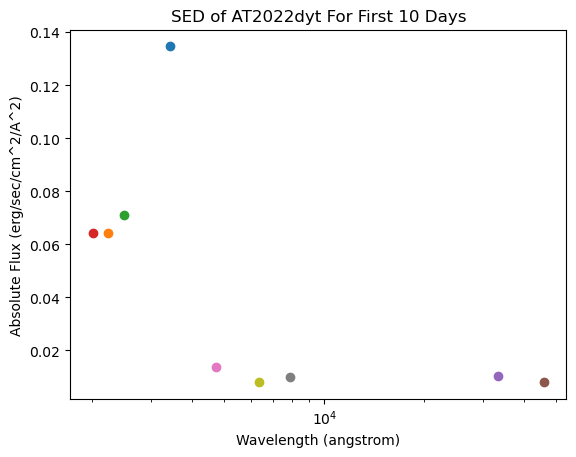

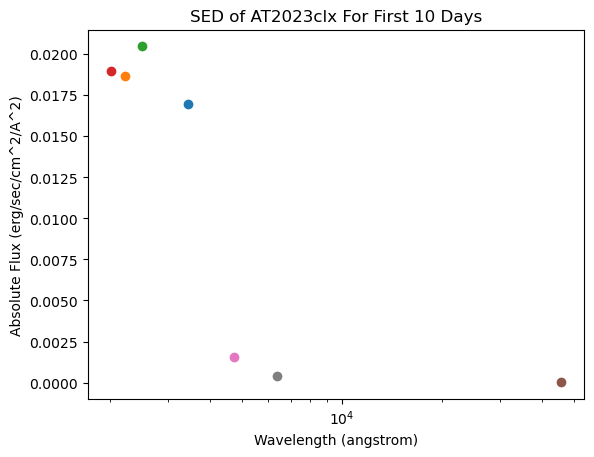

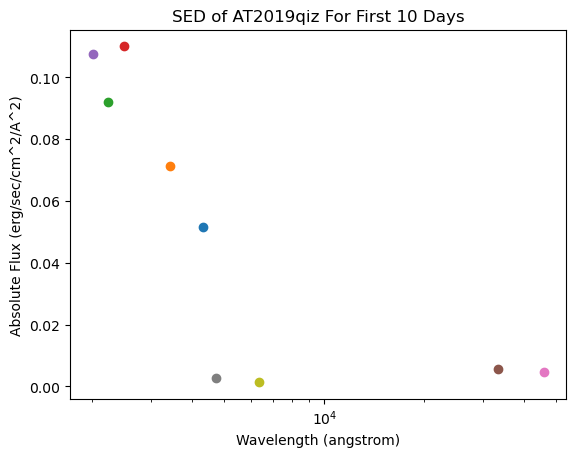

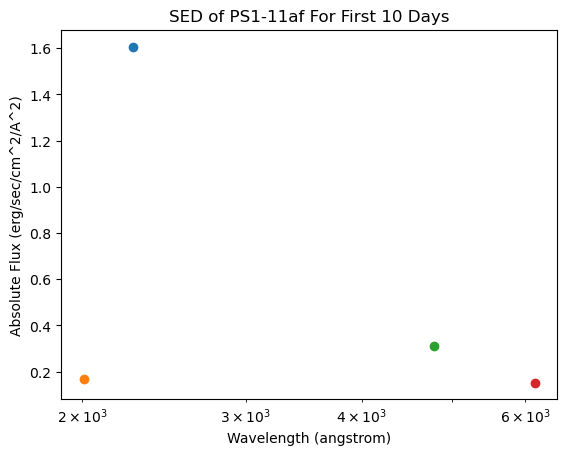

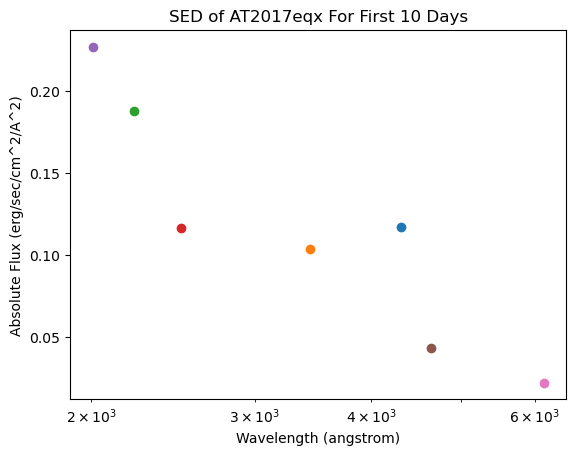

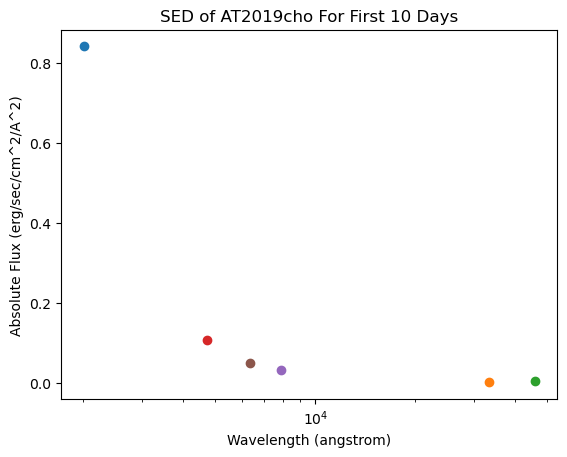

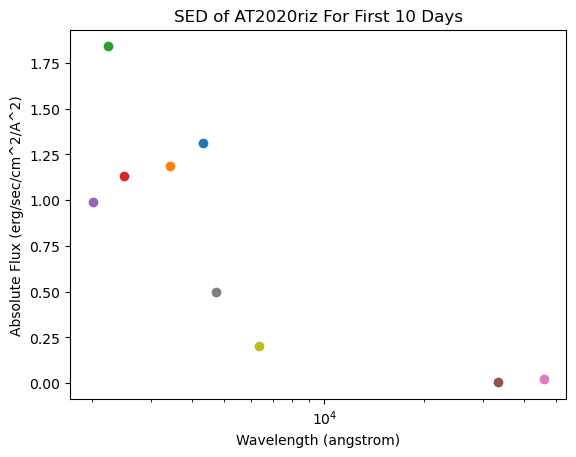

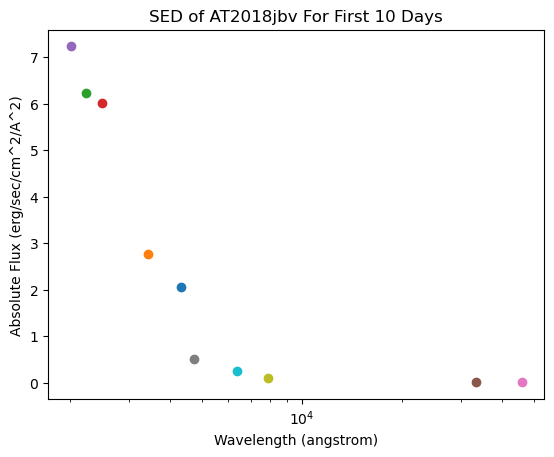

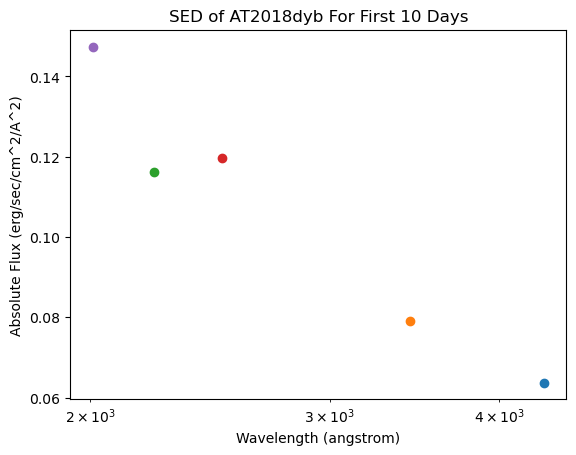

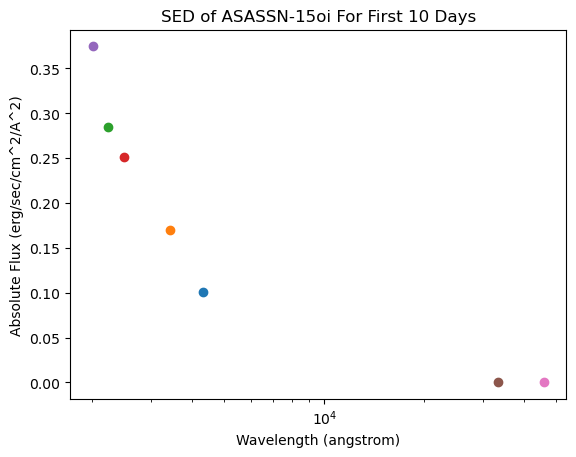

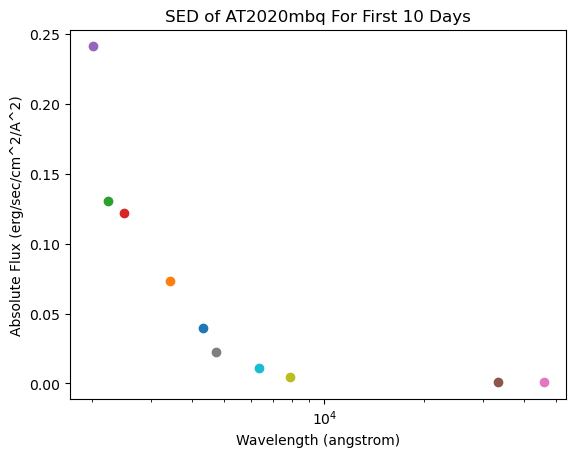

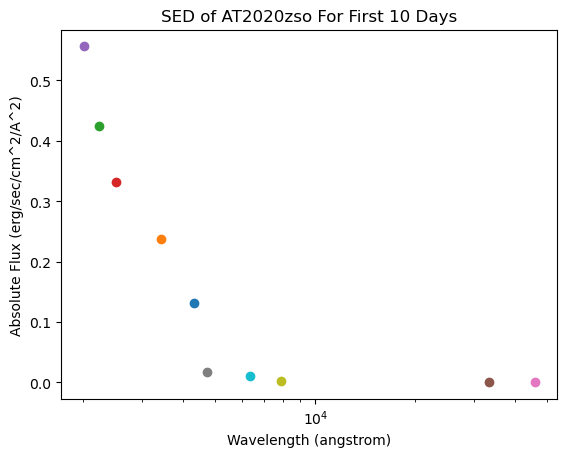

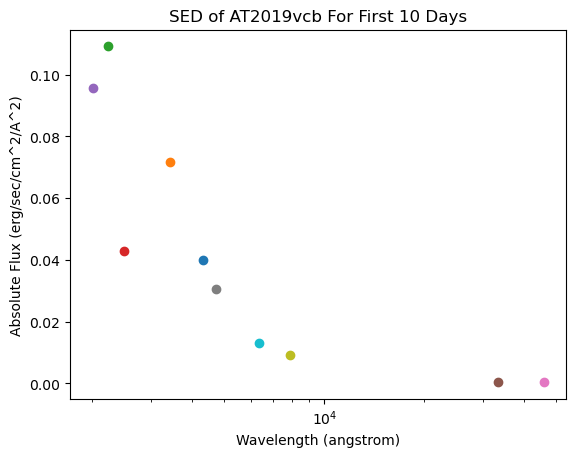

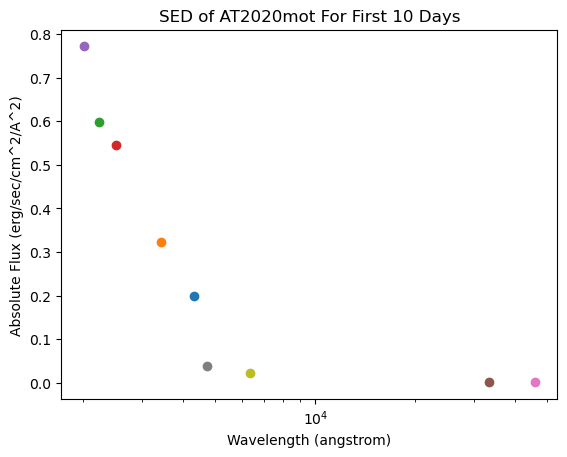

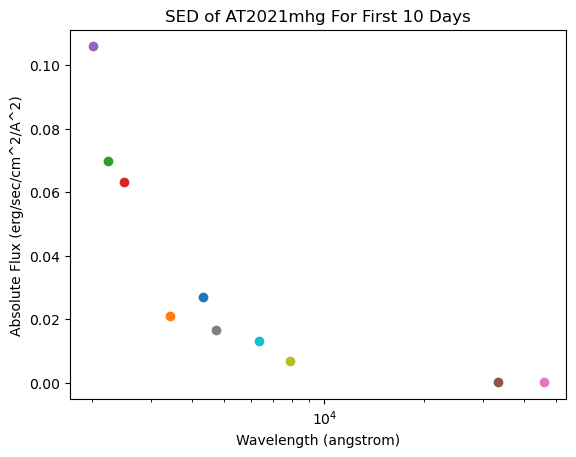

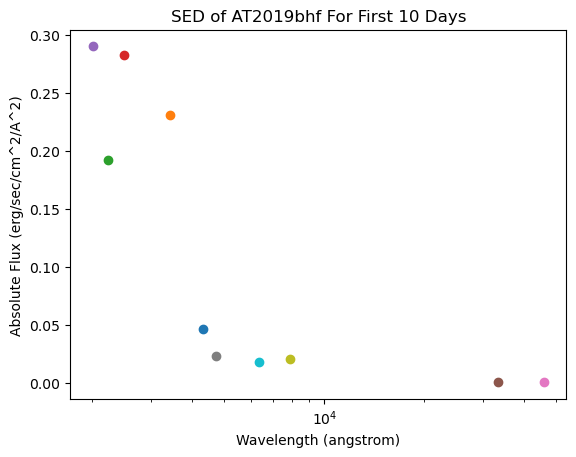

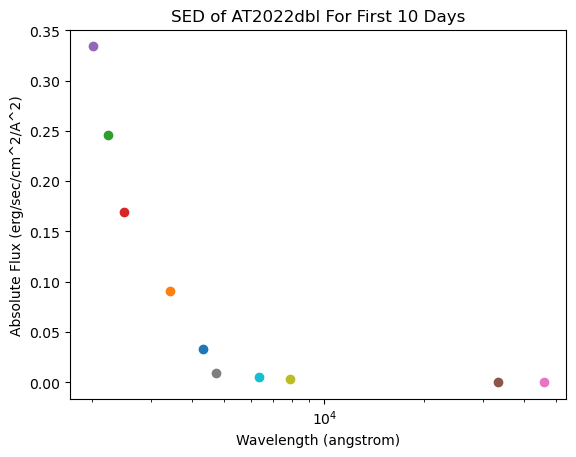

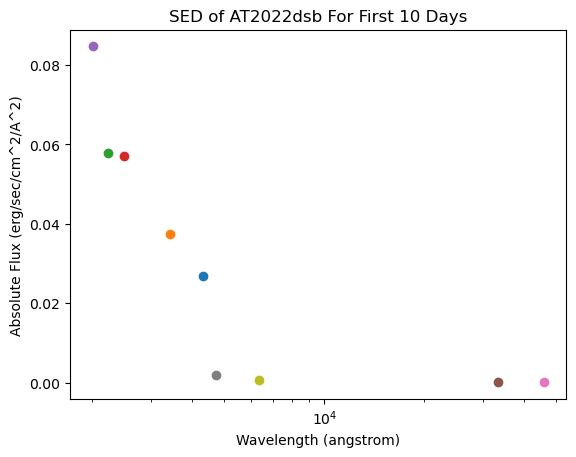

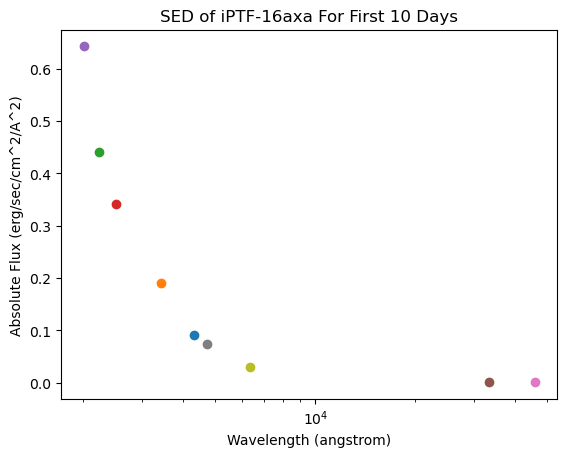

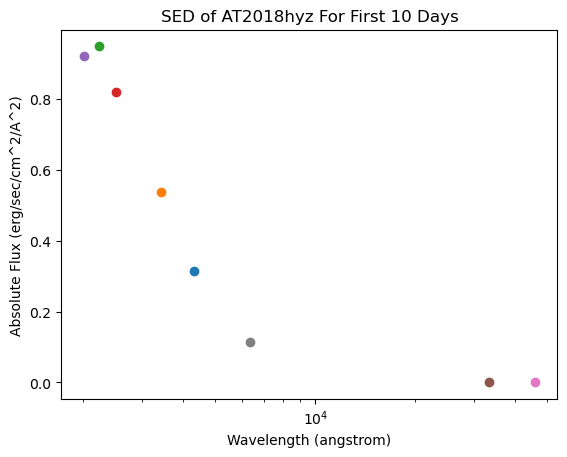

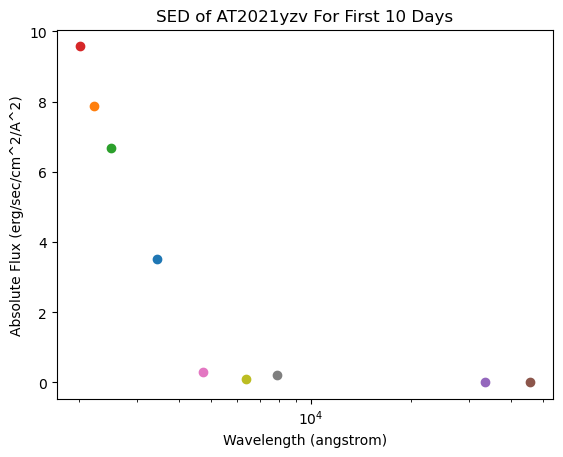

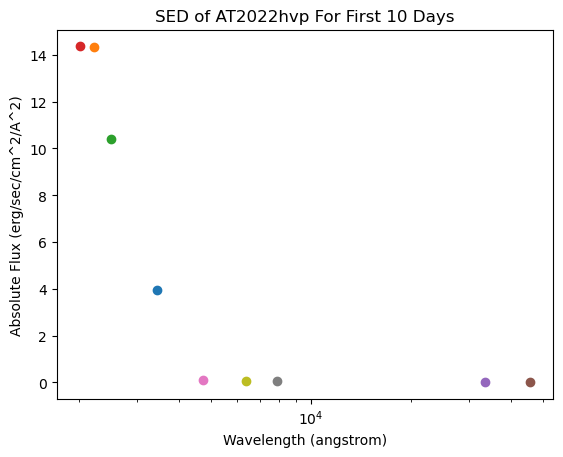

In [42]:
import pandas as pd
from astropy.cosmology import WMAP9 as cosmo
Ho = cosmo.H(0)  
from astropy.constants import c
from astropy.constants import e
sol = c.to(u.km/u.s)
def plot_SED10(tde_name):
    with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
        tde_data = json.load(f)
    Aflux = []
    abs_flux_bin = []
    abs_flux_mean = []
    abs_flux_mean_erg = []
    tde_lc = tde_data['lightcurve']
    tde_df = pd.DataFrame(tde_lc['data'], columns=tde_lc['header'])
    i_peak = np.where((np.abs(tde_df['mjd']-tde_data['peak_mjd']))<=10)
    lc_filters = tde_data['lightcurve']['filters']
    distance = (sol*tde_data.get('z'))/Ho         
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    wave_list = (np.array(tde_data['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())[0:len(lc_filters)]
    wave_dict = dict(zip(lc_filters, (np.array(tde_data['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())))
    flux_filter = tde_df['flux_Jy']
    flux_filter = np.array(flux_filter, dtype=float)*u.Jy
    mag_filter = flux_filter.to(u.ABmag)     
    absMag_filter = mag_filter.value - distance_mod 
    absMag_filter = absMag_filter.to_value()
    Aflux = (10**((absMag_filter-8.9)/(-2.5)))
    for element in lc_filters:
        i_filter = np.where(tde_df['filter']==element)
        Aflux_filter = np.nanmean(Aflux[i_filter])
        abs_flux_mean_erg = (Aflux_filter*.00003)/(wave_dict[element])**2
        SED10 = plt.scatter(wave_dict[element],(np.array(abs_flux_mean_erg)))
    plt.xlabel("Wavelength (angstrom)")
    plt.ylabel("Absolute Flux (erg/sec/cm^2/A^2)")
    plt.title("SED of {}".format(tde_name) + ' For First 10 Days')
    plt.xscale('log')
    #plt.savefig('SED and Lightcurve Folder/SED For First Five Entries of {}'.format(tde_name) + '.pdf')
    plt.show()
    #return()
for json_file in json_list[:]:
    tde_name = json_file[:-5]
    plot_SED10(tde_name) 

In [9]:
import pickle

with open('no_plateau_tdes.pkl', 'rb') as f:
    no_plateau = pickle.load(f)

In [10]:
with open('plateau_tdes.pkl', 'rb') as f:
    plateau = pickle.load(f)

In [89]:
plateau['Units']

['',
 '',
 '',
 '',
 '',
 'erg s$^{-1}$',
 'erg s$^{-1}$',
 'erg s$^{-1}$',
 'erg s$^{-1}$',
 'erg s$^{-1}$',
 'K',
 'erg',
 'cm',
 'days',
 'days',
 '$M_\\odot$',
 'km/s',
 '$M_\\odot$',
 '$M_\\odot$',
 '$M_\\odot$']

In [12]:
type(plateau)

dict

In [87]:
plateau['Peak temperature']

[array([4.43734319, 0.08143322, 0.09814942]),
 array([4.35956666, 0.03403115, 0.03653454]),
 array([4.67155608, 0.06750243, 0.08557152]),
 array([4.13595035, 0.01368924, 0.0139278 ]),
 array([4.35780131, 0.28138988, 0.39311174]),
 array([4.32395107, 0.02902334, 0.03026899]),
 array([4.60643053, 0.02214696, 0.02442837]),
 array([4.74529302, 0.07828442, 0.09420587]),
 array([4.20142961, 0.00951837, 0.01061189]),
 array([4.38428873, 0.01915405, 0.01966176]),
 array([4.54647884, 0.02455259, 0.02709302]),
 array([4.14038766, 0.00623225, 0.00604241]),
 array([4.93389731, 0.06355708, 0.04588914]),
 array([4.57165848, 0.02254128, 0.02394647]),
 array([4.41816271, 0.01925899, 0.02112159]),
 array([4.19403151, 0.01521666, 0.01689095]),
 array([4.11684403, 0.00681001, 0.00732966]),
 array([4.31862234, 0.00878707, 0.0090219 ]),
 array([4.23690937, 0.00931769, 0.0095283 ]),
 array([4.37240027, 0.02682118, 0.03082509]),
 array([4.47066879, 0.0180748 , 0.01876324]),
 array([4.15852667, 0.00703381, 0.

In [14]:
no_plateau['Name']

['GALEX-D23H-1',
 'PS1-11af',
 'AT2017eqx',
 'PTF-09axc',
 'AT2018bsi',
 'AT2018iih',
 'AT2019mha',
 'AT2019lwu',
 'AT2019teq',
 'AT2020pj',
 'AT2019vcb',
 'AT2020ddv',
 'AT2020ocn',
 'AT2020mbq',
 'AT2021jjm',
 'AT2021yzv',
 'AT2020abri',
 'AT2021utq']

In [77]:
from scipy.optimize import curve_fit
def SED10_ydata(tde_name):
    with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
        tde_data = json.load(f)
    Aflux = []
    abs_flux_bin = []
    abs_flux_mean = []
    abs_flux_mean_erg_list = []
    tde_lc = tde_data['lightcurve']
    tde_df = pd.DataFrame(tde_lc['data'], columns=tde_lc['header'])
    i_peak = np.where((np.abs(tde_df['mjd']-tde_data['peak_mjd']))<=10)
    lc_filters = tde_data['lightcurve']['filters']
    distance = (sol*tde_data.get('z'))/Ho         
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    wave_list = (np.array(tde_data['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())[0:len(lc_filters)]
    wave_dict = dict(zip(lc_filters, (np.array(tde_data['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())))
    flux_filter = tde_df['flux_Jy']
    flux_filter = np.array(flux_filter, dtype=float)*u.Jy
    mag_filter = flux_filter.to(u.ABmag)     
    absMag_filter = mag_filter.value - distance_mod 
    absMag_filter = absMag_filter.to_value()
    Aflux = (10**((absMag_filter-8.9)/(-2.5)))
    for element in lc_filters:
        i_filter = np.where(tde_df['filter']==element)
        Aflux_filter = np.nanmean(Aflux[i_filter])
        abs_flux_mean_erg = (Aflux_filter*.00003)/(wave_dict[element])**2
        abs_flux_mean_erg_list.append(abs_flux_mean_erg.to_value())
    abs_flux_mean_erg_list = np.array(abs_flux_mean_erg_list)
    return(abs_flux_mean_erg_list)
def SED10_wave(tde_name):
    with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
        tde_data = json.load(f)
    Aflux = []
    abs_flux_bin = []
    abs_flux_mean = []
    abs_flux_mean_erg = []
    tde_lc = tde_data['lightcurve']
    tde_df = pd.DataFrame(tde_lc['data'], columns=tde_lc['header'])
    i_peak = np.where((np.abs(tde_df['mjd']-tde_data['peak_mjd']))<=10)
    lc_filters = tde_data['lightcurve']['filters']
    distance = (sol*tde_data.get('z'))/Ho         
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    wave_list0 = (np.array(tde_data['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())[0:len(lc_filters)]
    wave_dict = dict(zip(lc_filters, (np.array(tde_data['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())))
    return(wave_list0)
print((SED10_wave('ASASSN-14li')))
print(len(SED10_ydata('ASASSN-14li')))

[ 4311.81994004  3434.77524091  2226.48332671  2500.58131664
  2008.44444658 33340.74630192 45819.24842446] Angstrom
7


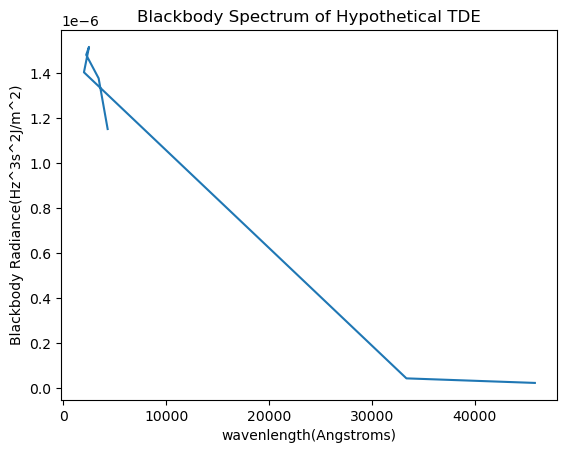

In [97]:
BB_TDE(SED10_wave('ASASSN-14li'),20000*u.K)

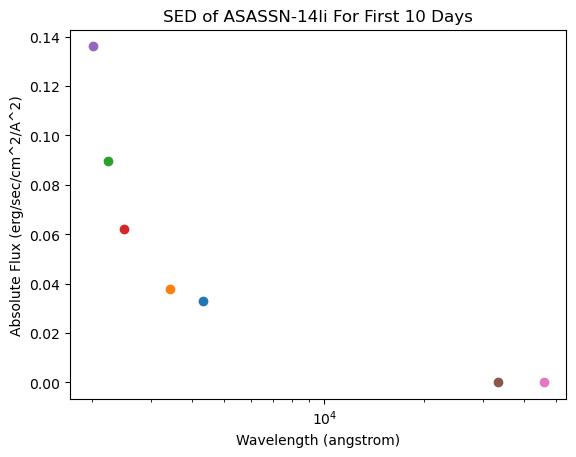

In [98]:
plot_SED10('ASASSN-14li')

In [68]:
popt, pcov = curve_fit(BB_TDE, SED10_wave('ASASSN-14li'),SED10_ydata('ASASSN-14li') , p0=(20000), sigma=None)

AttributeError: 'numpy.float64' object has no attribute 'to'